In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv("Summary of Weather.csv",low_memory=False) 
# low_memory elirtilen sütunlarda (7, 8, 18, 25) farklı veri türleri var onları daha düzgün tahmin etmeye yarar.

In [3]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
df.drop(["WTE","SD3","RHX","RHN","RVG","ITH","FTI","FB","FT","TSHDSBRSGF","PGT","SND","SPD","DR","WindGustSpd","PoorWeather"],
          axis=1,inplace=True)

In [8]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [9]:
df.shape

(119040, 15)

In [10]:
df.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 13.6+ MB


In [12]:
df["Snowfall"].value_counts()  

Snowfall
0          115690
5.08          534
2.54          339
7.62          330
10.16         205
12.7           92
20.32          83
17.78          78
15.24          74
22.86          69
25.4           68
#VALUE!        44
27.94          40
30.48          31
45.72          25
50.8           24
48.26          22
35.56          20
33.02          15
60.96          13
38.1           11
66.04          11
53.34          10
43.18          10
63.5            7
55.88           6
40.64           6
76.2            5
58.42           5
81.28           4
78.74           2
73.66           1
86.36           1
83.82           1
68.58           1
Name: count, dtype: int64

In [13]:
df["Snowfall"]=df["Snowfall"].replace("#VALUE!",np.nan)
df["Snowfall"]=df["Snowfall"].replace("",np.nan)
df["Snowfall"]=df["Snowfall"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117833 non-null  float64
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 13.6+ MB


In [15]:
df=df.dropna(subset=["Snowfall"])

In [16]:
df["Snowfall"].unique()

array([ 0.  , 22.86, 33.02, 30.48,  2.54,  5.08, 10.16,  7.62, 20.32,
       15.24, 17.78, 12.7 , 25.4 , 27.94, 43.18, 38.1 , 45.72, 53.34,
       58.42, 66.04, 76.2 , 81.28, 73.66, 63.5 , 50.8 , 48.26, 60.96,
       55.88, 35.56, 78.74, 40.64, 86.36, 83.82, 68.58])

In [17]:
df["Snowfall"].value_counts()  

Snowfall
0.00     115690
5.08        534
2.54        339
7.62        330
10.16       205
12.70        92
20.32        83
17.78        78
15.24        74
22.86        69
25.40        68
27.94        40
30.48        31
45.72        25
50.80        24
48.26        22
35.56        20
33.02        15
60.96        13
38.10        11
66.04        11
53.34        10
43.18        10
63.50         7
55.88         6
40.64         6
76.20         5
58.42         5
81.28         4
78.74         2
73.66         1
86.36         1
83.82         1
68.58         1
Name: count, dtype: int64

In [18]:
df["Snowfall"].isnull().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117833 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       117833 non-null  int64  
 1   Date      117833 non-null  object 
 2   Precip    117833 non-null  object 
 3   MaxTemp   117833 non-null  float64
 4   MinTemp   117833 non-null  float64
 5   MeanTemp  117833 non-null  float64
 6   Snowfall  117833 non-null  float64
 7   YR        117833 non-null  int64  
 8   MO        117833 non-null  int64  
 9   DA        117833 non-null  int64  
 10  PRCP      116130 non-null  object 
 11  MAX       117371 non-null  float64
 12  MIN       117378 non-null  float64
 13  MEA       117348 non-null  float64
 14  SNF       117833 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 14.4+ MB


In [20]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0


In [21]:
df.STA.unique()

array([10001, 10002, 10101, 10102, 10502, 10505, 10701, 10703, 10704,
       10705, 10718, 10802, 10803, 10804, 10806, 10807, 11101, 11103,
       11501, 11601, 11604, 11606, 11610, 11615, 11701, 11704, 11801,
       11901, 11902, 12001, 12101, 12701, 12702, 12801, 13002, 13005,
       13007, 13013, 13201, 13601, 15027, 16101, 16201, 16202, 16405,
       16407, 16504, 20501, 20602, 21501, 22502, 22504, 22507, 22508,
       22509, 30001, 31001, 31101, 31302, 31401, 31501, 31701, 32301,
       32501, 32503, 32504, 32601, 32602, 32603, 32701, 32702, 32801,
       32803, 32805, 32812, 32815, 32904, 32906, 32907, 33003, 33013,
       33014, 33019, 33023, 33031, 33044, 33109, 33111, 33117, 33121,
       33123, 33205, 33206, 33303, 33305, 33307, 33401, 33405, 33406,
       33501, 34002, 34003, 34005, 34012, 34013, 34017, 34018, 34022,
       34101, 34104, 34105, 34109, 34111, 34113, 34123, 34139, 34147,
       34150, 40601, 41204, 41207, 42204, 42206, 42401, 43201, 43302,
       43305, 43307,

In [22]:
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\KOLUMAN\AppData\Local\Temp\ipykernel_9664\1380596044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"]=pd.to_datetime(df["Date"])


In [23]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0


In [24]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [25]:
df["Precip"].value_counts()

Precip
0          63737
T          16474
0.254       3339
0.508       2864
0.762       1982
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [26]:
df["Precip"].str.isnumeric().sum()

63739

In [27]:
df["Precip"].apply(type).value_counts() # hangi veri tipinden kaç tane varsa onu göztermeye yarar

Precip
<class 'str'>    117833
Name: count, dtype: int64

In [28]:
df["Precip"]=df["Precip"].replace("T",np.nan)
df["Precip"]=df["Precip"].astype(float)
df=df.dropna(subset=["Precip"])

C:\Users\KOLUMAN\AppData\Local\Temp\ipykernel_9664\543392510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Precip"]=df["Precip"].replace("T",np.nan)
C:\Users\KOLUMAN\AppData\Local\Temp\ipykernel_9664\543392510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Precip"]=df["Precip"].astype(float)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101359 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       101359 non-null  int64         
 1   Date      101359 non-null  datetime64[ns]
 2   Precip    101359 non-null  float64       
 3   MaxTemp   101359 non-null  float64       
 4   MinTemp   101359 non-null  float64       
 5   MeanTemp  101359 non-null  float64       
 6   Snowfall  101359 non-null  float64       
 7   YR        101359 non-null  int64         
 8   MO        101359 non-null  int64         
 9   DA        101359 non-null  int64         
 10  PRCP      99656 non-null   object        
 11  MAX       100941 non-null  float64       
 12  MIN       100947 non-null  float64       
 13  MEA       100918 non-null  float64       
 14  SNF       101359 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(4), object(2)
memory usage: 12.4+ MB


In [30]:
df.PRCP.unique()

array(['0.04', '0', '0.1', '0.14', '0.02', '0.01', '0.07', '0.13', '0.03',
       '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94', '0.16',
       '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12', '0.33',
       '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27', '2.29',
       '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21', '0.19',
       '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47', '0.23',
       '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06', '0.55',
       '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54', '1.42',
       '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86', '4.76',
       '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97', '0.69',
       '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35', '0.97',
       '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1', '1.37',
       '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33', '1.33',
       '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24', '1.43',
       '1.4

In [31]:
df["PRCP"]=df["PRCP"].astype(float)

In [32]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
YR             0
MO             0
DA             0
PRCP        1703
MAX          418
MIN          412
MEA          441
SNF            0
dtype: int64

In [33]:
df=df.dropna(subset=["PRCP"])

In [34]:
df.isnull().sum()

STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
Snowfall      0
YR            0
MO            0
DA            0
PRCP          0
MAX         416
MIN         404
MEA         431
SNF           0
dtype: int64

In [35]:
df.MAX.unique()

array([ 78.,  84.,  79.,  80.,  76.,  82.,  81.,  77.,  75.,  91.,  83.,
        86.,  88.,  94.,  89.,  90.,  85.,  87.,  92.,  93.,  95.,  74.,
        70.,  96.,  97.,  98.,  99.,  nan,  73.,  72.,  68.,  71.,  65.,
        67.,  69.,  66., 100., 102., 101.,  63.,  62.,  64.,  61.,  59.,
        60., 105., 107., 103., 104., 108., 106., 109., 112., 115., 117.,
       113., 116., 111., 114., 110.,  58.,  56.,  55.,  53.,  57.,  54.,
        46.,  52.,  50.,  47.,  51.,  44.,  49.,  48.,  45.,  22.,  24.,
        19.,  30.,  39.,  27.,  43.,  42.,  23.,  33.,  38.,  34.,  41.,
        36.,  31.,  29.,  40.,  28.,  37.,  32.,  25.,  12.,  21.,  35.,
        16.,  18.,  20.,  26.,  13.,  11.,  14.,   6.,  17.,  15.,   4.,
         9.,  10.,   5.,   2.,   3.,   8.,   1.,  -3.,   7.,  -5.,  -1.,
         0.,  -2.,  -6., -17., -20., -15.,  -8., -22., -11., -10., -18.,
        -9.,  -4., -23., -12., -25., -14.,  -7., -28., -27., -24., 118.,
       119., 120., 122., 121.])

In [36]:
df["MAX"].info()

<class 'pandas.core.series.Series'>
Index: 99656 entries, 0 to 119039
Series name: MAX
Non-Null Count  Dtype  
--------------  -----  
99240 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [37]:
df.dropna()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.000,28.333333,18.333333,23.333333,0.0,45,12,27,0.00,83.0,65.0,74.0,0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,0.39,85.0,65.0,75.0,0
119037,82506,1945-12-29,0.000,28.333333,18.333333,23.333333,0.0,45,12,29,0.00,83.0,65.0,74.0,0
119038,82506,1945-12-30,0.000,28.333333,18.333333,23.333333,0.0,45,12,30,0.00,83.0,65.0,74.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       99656 non-null  int64         
 1   Date      99656 non-null  datetime64[ns]
 2   Precip    99656 non-null  float64       
 3   MaxTemp   99656 non-null  float64       
 4   MinTemp   99656 non-null  float64       
 5   MeanTemp  99656 non-null  float64       
 6   Snowfall  99656 non-null  float64       
 7   YR        99656 non-null  int64         
 8   MO        99656 non-null  int64         
 9   DA        99656 non-null  int64         
 10  PRCP      99656 non-null  float64       
 11  MAX       99240 non-null  float64       
 12  MIN       99252 non-null  float64       
 13  MEA       99225 non-null  float64       
 14  SNF       99656 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
memory usage: 12.2+ MB


In [39]:
df.SNF.unique()

array(['0', '0.9', '1.2', '0.1', '0.2', '0.4', '0.3', '0.8', '0.6', '0.7',
       '0.5', '1', '1.1', '1.3', '1.7', '1.5', '1.8', '2.1', '2.3', '2.6',
       '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2', '1.4', '3.1',
       '1.6', '3.4', '3.3', '2.7'], dtype=object)

In [40]:
df["SNF"]=df["SNF"].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       99656 non-null  int64         
 1   Date      99656 non-null  datetime64[ns]
 2   Precip    99656 non-null  float64       
 3   MaxTemp   99656 non-null  float64       
 4   MinTemp   99656 non-null  float64       
 5   MeanTemp  99656 non-null  float64       
 6   Snowfall  99656 non-null  float64       
 7   YR        99656 non-null  int64         
 8   MO        99656 non-null  int64         
 9   DA        99656 non-null  int64         
 10  PRCP      99656 non-null  float64       
 11  MAX       99240 non-null  float64       
 12  MIN       99252 non-null  float64       
 13  MEA       99225 non-null  float64       
 14  SNF       99656 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 12.2 MB


In [42]:
df.describe()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
count,99656.000000,99656,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99240.000000,99252.000000,99225.000000,99656.000000
mean,29829.761289,1944-05-09 03:01:34.501083648,3.833469,27.515999,17.978881,22.742384,0.235430,43.835825,6.735360,15.788994,0.150924,81.870556,64.623967,73.253102,0.009269
min,10001.000000,1940-01-01 00:00:00,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,0.000000,-28.000000,-37.000000,-32.000000,0.000000
25%,11801.000000,1943-09-19 00:00:00,0.000000,25.555556,15.000000,21.111111,0.000000,43.000000,4.000000,8.000000,0.000000,79.000000,60.000000,70.000000,0.000000
50%,31001.000000,1944-07-06 00:00:00,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,0.000000,85.000000,70.000000,78.000000,0.000000
75%,33501.000000,1945-03-21 00:00:00,1.778000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,0.070000,89.000000,74.000000,81.000000,0.000000
max,82506.000000,1945-12-31 00:00:00,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,12.100000,122.000000,94.000000,104.000000,3.400000
std,20950.017170,NaN,11.691854,8.277454,7.963242,7.865045,2.640595,1.121163,3.427004,8.799605,0.460309,13.962201,13.760984,13.344885,0.103960


In [43]:
df.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [44]:
df.drop(["Date","YR","MO","DA","SNF"],axis=1 ,inplace=True)

In [45]:
df.columns

Index(['STA', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PRCP',
       'MAX', 'MIN', 'MEA'],
      dtype='object')

In [46]:
df.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,MAX,MIN,MEA
count,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99240.000000,99252.000000,99225.000000
mean,29829.761289,3.833469,27.515999,17.978881,22.742384,0.235430,0.150924,81.870556,64.623967,73.253102
std,20950.017170,11.691854,8.277454,7.963242,7.865045,2.640595,0.460309,13.962201,13.760984,13.344885
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,0.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,0.000000,25.555556,15.000000,21.111111,0.000000,0.000000,79.000000,60.000000,70.000000
50%,31001.000000,0.000000,29.444444,21.111111,25.555556,0.000000,0.000000,85.000000,70.000000,78.000000
75%,33501.000000,1.778000,31.666667,23.333333,27.222222,0.000000,0.070000,89.000000,74.000000,81.000000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,12.100000,122.000000,94.000000,104.000000


In [47]:
df.corr()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,MAX,MIN,MEA
STA,1.000000,0.013003,0.072478,0.035872,0.056226,-0.055978,0.013003,0.061722,0.025125,0.045280
Precip,0.013003,1.000000,-0.009805,0.097577,0.044556,-0.010960,1.000000,-0.011299,0.101719,0.046730
MaxTemp,0.072478,-0.009805,1.000000,0.859969,0.964718,-0.326502,-0.009805,1.000000,0.848259,0.962234
MinTemp,0.035872,0.097577,0.859969,1.000000,0.960033,-0.306342,0.097577,0.850744,1.000000,0.961019
MeanTemp,0.056226,0.044556,0.964718,0.960033,1.000000,-0.326848,0.044556,0.960255,0.957153,1.000000
Snowfall,-0.055978,-0.010960,-0.326502,-0.306342,-0.326848,1.000000,-0.010960,-0.349476,-0.320009,-0.347901
PRCP,0.013003,1.000000,-0.009805,0.097577,0.044556,-0.010960,1.000000,-0.011299,0.101719,0.046730
MAX,0.061722,-0.011299,1.000000,0.850744,0.960255,-0.349476,-0.011299,1.000000,0.851997,0.962234
MIN,0.025125,0.101719,0.848259,1.000000,0.957153,-0.320009,0.101719,0.851997,1.000000,0.961238
MEA,0.045280,0.046730,0.962234,0.961019,1.000000,-0.347901,0.046730,0.962234,0.961238,1.000000


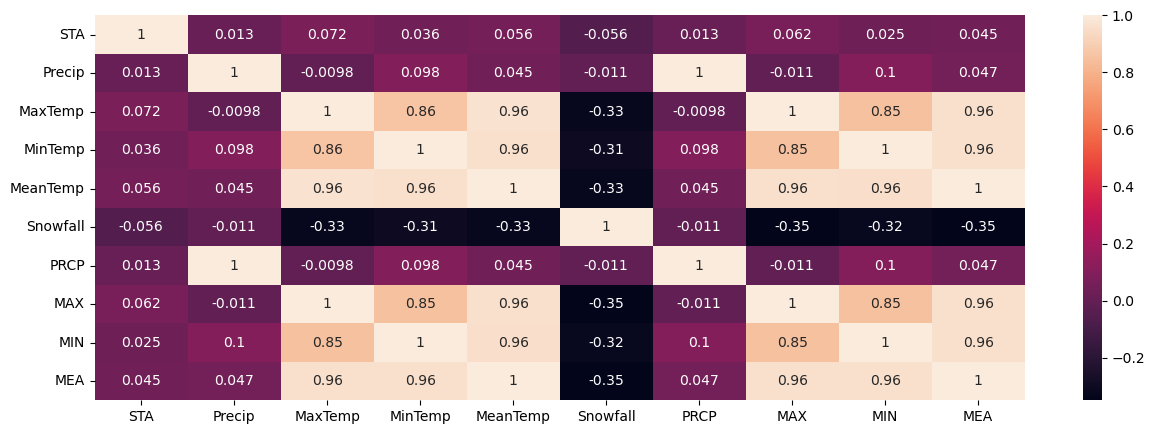

In [48]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [49]:
df.drop(["MAX","MIN","MEA"],axis=1 ,inplace=True)

In [50]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP
0,10001,1.016,25.555556,22.222222,23.888889,0.0,0.04
1,10001,0.000,28.888889,21.666667,25.555556,0.0,0.00
2,10001,2.540,26.111111,22.222222,24.444444,0.0,0.10
3,10001,2.540,26.666667,22.222222,24.444444,0.0,0.10
4,10001,0.000,26.666667,21.666667,24.444444,0.0,0.00


In [51]:
X=df.drop("MeanTemp",axis=1)
y=df["MeanTemp"]

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
X_train.corr()

,STA,Precip,MaxTemp,MinTemp,Snowfall,PRCP
STA,1.000000,0.015790,0.071207,0.035838,-0.055412,0.015790
Precip,0.015790,1.000000,-0.009921,0.098842,-0.010456,1.000000
MaxTemp,0.071207,-0.009921,1.000000,0.859385,-0.325789,-0.009921
MinTemp,0.035838,0.098842,0.859385,1.000000,-0.305805,0.098842
Snowfall,-0.055412,-0.010456,-0.325789,-0.305805,1.000000,-0.010456
PRCP,0.015790,1.000000,-0.009921,0.098842,-0.010456,1.000000


In [54]:
def corelation_drop(df,thresold):
    columns_drop=set()
    corr=df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]>thresold):
                columns_drop.add(corr.columns[i])
    return columns_drop       

In [55]:
def corelation_drop(df,thresold):
    columns_drop=set()
    for i in range(len(df.corr().columns)):
        for j in range(i):
            if abs(df.corr().iloc[i,j]>thresold):
                columns_drop.add(df.corr().columns[i])
    return columns_drop       

In [56]:
columns_dropping=corelation_drop(X_train,0.85)

In [57]:
columns_dropping

{'MinTemp', 'PRCP'}

In [58]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)

In [59]:
X_train.shape

(74742, 4)

In [60]:
X_test.shape

(24914, 4)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

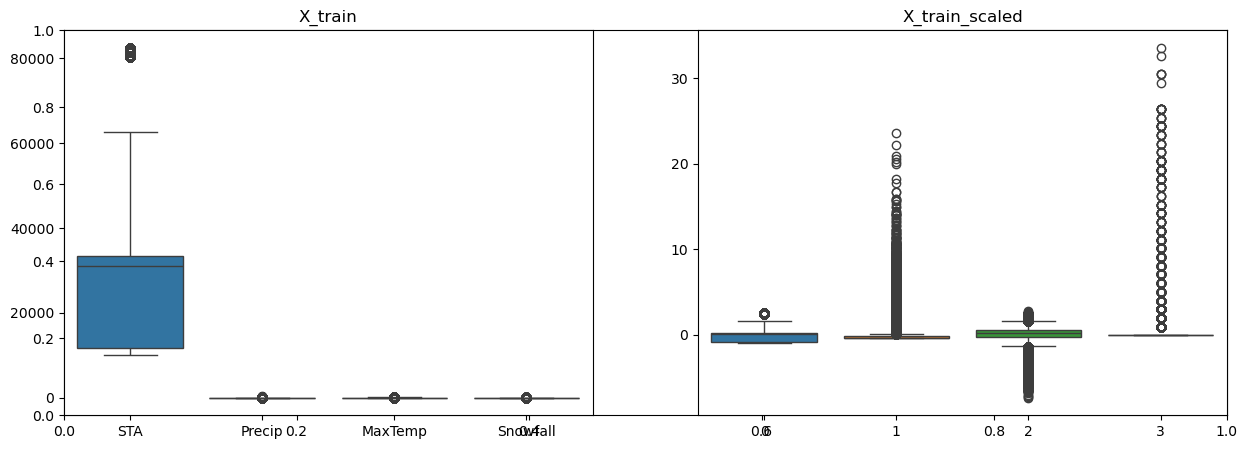

In [62]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [64]:
linear.coef_

array([-0.11340646,  0.42945721,  7.53665918, -0.10364627])

In [65]:
linear.intercept_

22.759685912607193

In [66]:
y_pred=linear.predict(X_test_scaled)

In [67]:
y_pred

array([22.93600083, 27.12721918, 23.53595986, ..., 25.48603975,
       23.95703769, 32.22397821])

mse: 4.117486192746189
mae: 1.575907411657908
rmse: 2.0291589865622135
r2_score: 0.9348640977649578
adj: 0.9348536379468624


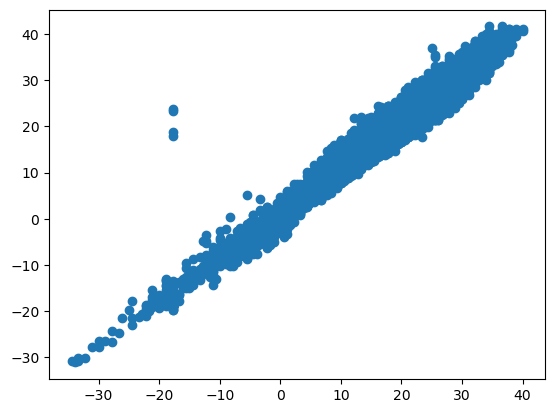

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
adj=(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("r2_score:",score)
print("adj:",adj)
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error: 1.5759081958578223
mean_squared_error: 4.117488076354991
rmse: 2.029159450697503
r2_score: 0.9348640679675151


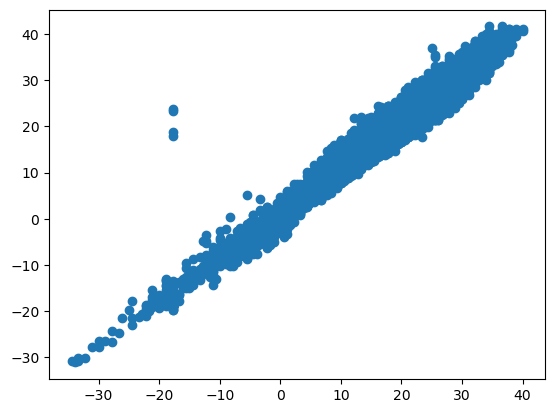

In [76]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error: 1.82727800858557
mean_squared_error: 5.356701346971662
rmse: 2.3144548703683254
r2_score: 0.9152605354564761


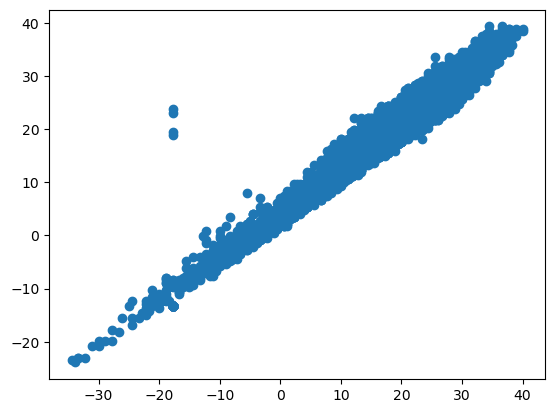

In [82]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error: 2.657695764045324
mean_squared_error: 12.439704881977894
rmse: 3.5269965809421895
r2_score: 0.8032121146021689


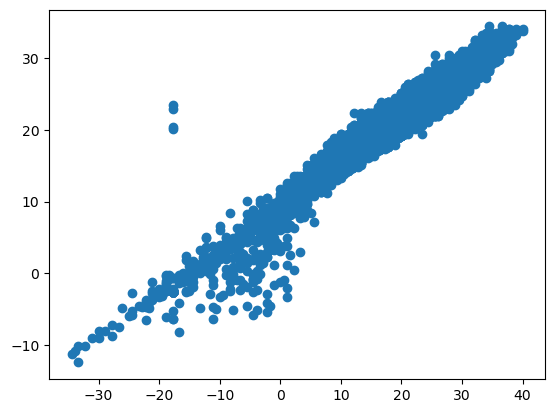

In [84]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error: 1.5757513375982062
mean_squared_error: 4.11676250831965
rmse: 2.028980657453306
r2_score: 0.9348755459728811


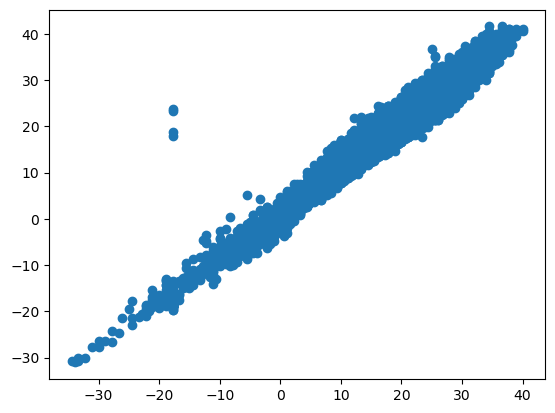

In [86]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [88]:
lassocv.alpha_

0.007558090167813567

In [90]:
lassocv.alphas_

array([7.55809017, 7.04870019, 6.57364139, 6.13059996, 5.71741804,
       5.3320832 , 4.97271864, 4.63757404, 4.32501707, 4.0335254 ,
       3.76167929, 3.50815469, 3.27171681, 3.05121404, 2.84557243,
       2.65379037, 2.47493378, 2.30813153, 2.15257119, 2.0074951 ,
       1.87219665, 1.74601686, 1.62834116, 1.51859642, 1.4162481 ,
       1.32079772, 1.23178038, 1.1487625 , 1.07133975, 0.99913504,
       0.93179668, 0.8689967 , 0.81042923, 0.75580902, 0.70487002,
       0.65736414, 0.61306   , 0.5717418 , 0.53320832, 0.49727186,
       0.4637574 , 0.43250171, 0.40335254, 0.37616793, 0.35081547,
       0.32717168, 0.3051214 , 0.28455724, 0.26537904, 0.24749338,
       0.23081315, 0.21525712, 0.20074951, 0.18721966, 0.17460169,
       0.16283412, 0.15185964, 0.14162481, 0.13207977, 0.12317804,
       0.11487625, 0.10713398, 0.0999135 , 0.09317967, 0.08689967,
       0.08104292, 0.0755809 , 0.070487  , 0.06573641, 0.061306  ,
       0.05717418, 0.05332083, 0.04972719, 0.04637574, 0.04325

mean_absolute_error: 1.5759074900796564
mean_squared_error: 4.117486380061029
rmse: 2.029159032717995
r2_score: 0.9348640948017612


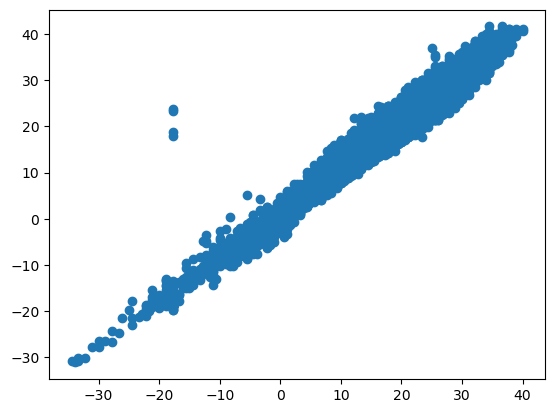

In [92]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [94]:
ridgecv.alpha_

0.1

mean_absolute_error: 1.5770836739975254
mean_squared_error: 4.122205686892122
rmse: 2.030321572286548
r2_score: 0.9347894384959529


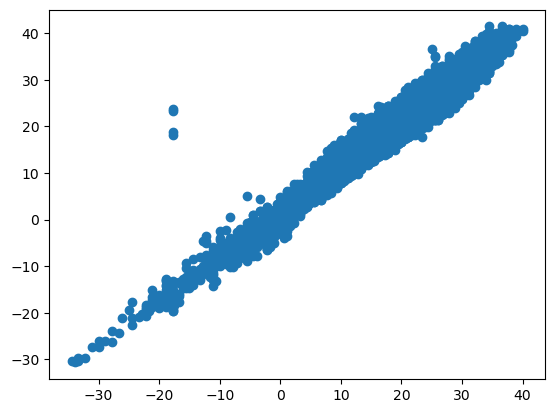

In [102]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("rmse:",rmse)
print("r2_score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [104]:
elasticnetcv.alpha_

0.015116180335627134

In [106]:
elasticnetcv.alphas_

array([15.11618034, 14.09740037, 13.14728277, 12.26119991, 11.43483608,
       10.6641664 ,  9.94543727,  9.27514809,  8.65003415,  8.0670508 ,
        7.52335857,  7.01630939,  6.54343362,  6.10242809,  5.69114486,
        5.30758074,  4.94986757,  4.61626306,  4.30514238,  4.01499019,
        3.74439329,  3.49203371,  3.25668233,  3.03719284,  2.83249621,
        2.64159544,  2.46356075,  2.297525  ,  2.14267951,  1.99827008,
        1.86359336,  1.73799341,  1.62085847,  1.51161803,  1.40974004,
        1.31472828,  1.22611999,  1.14348361,  1.06641664,  0.99454373,
        0.92751481,  0.86500341,  0.80670508,  0.75233586,  0.70163094,
        0.65434336,  0.61024281,  0.56911449,  0.53075807,  0.49498676,
        0.46162631,  0.43051424,  0.40149902,  0.37443933,  0.34920337,
        0.32566823,  0.30371928,  0.28324962,  0.26415954,  0.24635608,
        0.2297525 ,  0.21426795,  0.19982701,  0.18635934,  0.17379934,
        0.16208585,  0.1511618 ,  0.140974  ,  0.13147283,  0.12